<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(3_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_3.6_n20.csv',
 'data_multi_delta_3.6_n30.csv',
 'data_multi_delta_3.6_n60.csv',
 'data_multi_delta_3.6_n120.csv',
 'data_multi_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,30.489364,85.826487,85.363840,-110.150721,101.528971,547.096598,-445.567628
1,0.0,1.0,65.648008,26.294996,56.370679,-148.362027,9.951657,-177.030543,186.982200
2,0.0,2.0,94.286645,85.993817,95.186043,964.393373,1249.859879,298.440074,951.419805
3,0.0,3.0,54.554168,99.252643,62.528392,4567.359367,4793.694572,714.652222,4079.042350
4,0.0,4.0,87.090325,51.865125,35.089611,-457.488282,-273.443221,139.538005,-412.981225
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,42.542319,21.661909,68.837063,-193.359975,-50.318683,-25.228916,-25.089767
19996,999.0,16.0,27.882199,75.448024,89.977822,-1348.573723,-1145.265677,-703.020283,-442.245394
19997,999.0,17.0,29.240166,43.476382,59.761679,-612.631689,-470.153463,-203.309614,-266.843849
19998,999.0,18.0,36.095275,83.813001,64.319325,-2233.449963,-2039.222362,-213.662215,-1825.560147


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,30.489364,85.826487,85.363840,-110.150721,101.528971,547.096598,-445.567628
1,0.0,1.0,65.648008,26.294996,56.370679,-148.362027,9.951657,-177.030543,186.982200
2,0.0,2.0,94.286645,85.993817,95.186043,964.393373,1249.859879,298.440074,951.419805
3,0.0,3.0,54.554168,99.252643,62.528392,4567.359367,4793.694572,714.652222,4079.042350
4,0.0,4.0,87.090325,51.865125,35.089611,-457.488282,-273.443221,139.538005,-412.981225
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,42.542319,21.661909,68.837063,-193.359975,-50.318683,-25.228916,-25.089767
19996,999.0,16.0,27.882199,75.448024,89.977822,-1348.573723,-1145.265677,-703.020283,-442.245394
19997,999.0,17.0,29.240166,43.476382,59.761679,-612.631689,-470.153463,-203.309614,-266.843849
19998,999.0,18.0,36.095275,83.813001,64.319325,-2233.449963,-2039.222362,-213.662215,-1825.560147


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    30.489364  85.826487  ...  547.096598  -445.567628
      1.0    65.648008  26.294996  ... -177.030543   186.982200
      2.0    94.286645  85.993817  ...  298.440074   951.419805
      3.0    54.554168  99.252643  ...  714.652222  4079.042350
      4.0    87.090325  51.865125  ...  139.538005  -412.981225
...                ...        ...  ...         ...          ...
999.0 15.0   42.542319  21.661909  ...  -25.228916   -25.089767
      16.0   27.882199  75.448024  ... -703.020283  -442.245394
      17.0   29.240166  43.476382  ... -203.309614  -266.843849
      18.0   36.095275  83.813001  ... -213.662215 -1825.560147
      19.0   32.339959  31.585989  ... -182.142664   847.239492

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    30.489364  85.826487  ...  547.096598  -445.567628
      1.0    65.648008  26.294996  ... -177.030543   186.982200
      2.0    94.286645  85.993817  ...  298.440074   951.419805
      3.0    54.554168  99.252643  ...  714.652222  4079.042350
      4.0    87.090325  51.865125  ...  139.538005  -412.981225
...                ...        ...  ...         ...          ...
999.0 15.0   42.542319  21.661909  ...  -25.228916   -25.089767
      16.0   27.882199  75.448024  ... -703.020283  -442.245394
      17.0   29.240166  43.476382  ... -203.309614  -266.843849
      18.0   36.095275  83.813001  ... -213.662215 -1825.560147
      19.0   32.339959  31.585989  ... -182.142664   847.239492

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,30.489364,85.826487,85.363840,-110.150721,101.528971,547.096598,-445.567628
1,0.0,1.0,65.648008,26.294996,56.370679,-148.362027,9.951657,-177.030543,186.982200
2,0.0,2.0,94.286645,85.993817,95.186043,964.393373,1249.859879,298.440074,951.419805
3,0.0,3.0,54.554168,99.252643,62.528392,4567.359367,4793.694572,714.652222,4079.042350
4,0.0,4.0,87.090325,51.865125,35.089611,-457.488282,-273.443221,139.538005,-412.981225
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,42.542319,21.661909,68.837063,-193.359975,-50.318683,-25.228916,-25.089767
19996,999.0,16.0,27.882199,75.448024,89.977822,-1348.573723,-1145.265677,-703.020283,-442.245394
19997,999.0,17.0,29.240166,43.476382,59.761679,-612.631689,-470.153463,-203.309614,-266.843849
19998,999.0,18.0,36.095275,83.813001,64.319325,-2233.449963,-2039.222362,-213.662215,-1825.560147


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat        e_hat
rep   index                        ...                         
0.0   0.0    30.489364  85.826487  ...  547.096598  -445.567628
      1.0    65.648008  26.294996  ... -177.030543   186.982200
      2.0    94.286645  85.993817  ...  298.440074   951.419805
      3.0    54.554168  99.252643  ...  714.652222  4079.042350
      4.0    87.090325  51.865125  ...  139.538005  -412.981225
...                ...        ...  ...         ...          ...
999.0 15.0   42.542319  21.661909  ...  -25.228916   -25.089767
      16.0   27.882199  75.448024  ... -703.020283  -442.245394
      17.0   29.240166  43.476382  ... -203.309614  -266.843849
      18.0   36.095275  83.813001  ... -213.662215 -1825.560147
      19.0   32.339959  31.585989  ... -182.142664   847.239492

[20000 rows x 7 columns]

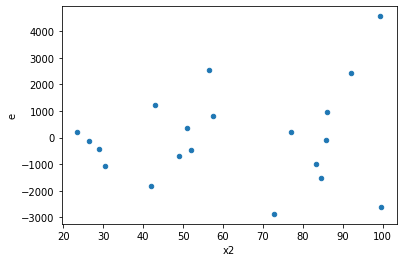

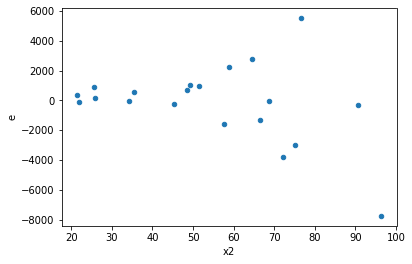

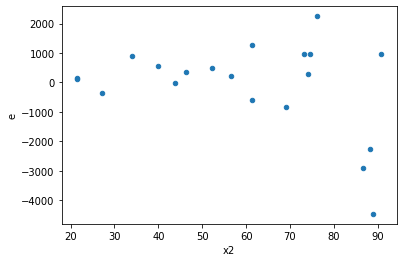

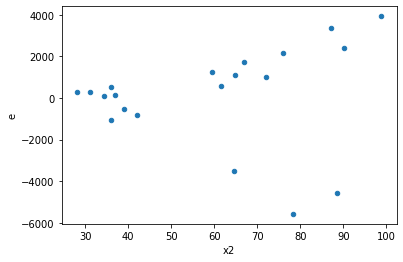

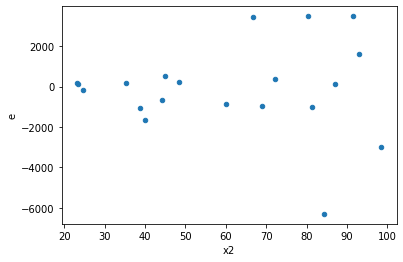

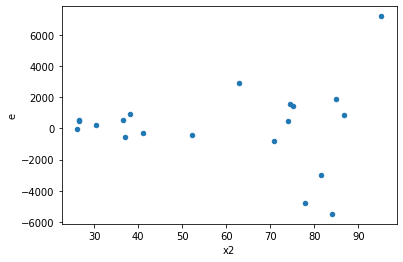

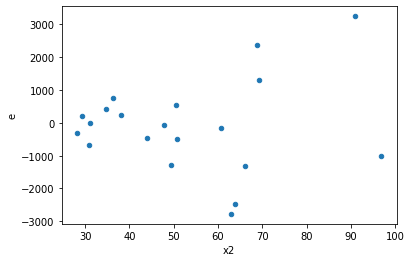

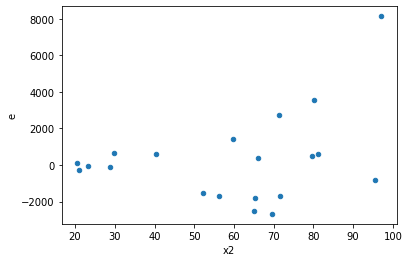

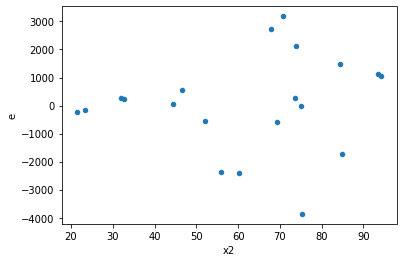

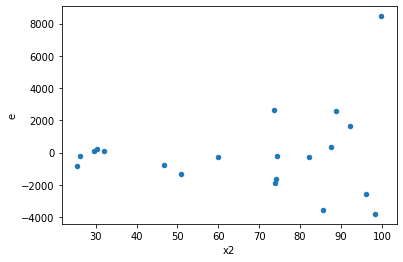

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,26830231.04269993,4009506.903245607,6707557.760674982,1002376.7258114017,6.691653534997397,0.05723195061737618,0.9713840246913119,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,83745886.19625051,972020.1587699988,20936471.54906263,243005.0396924997,86.15653229067095,0.00015132793825212154,0.9999243360308739,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,15867211.688371507,829382.3105057348,3966802.922092877,207345.5776264337,19.131360154879737,0.005660197854967519,0.9971699010725162,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,84935631.64248465,737419.5388556015,21233907.910621163,184354.88471390036,115.17952422890222,7.399253285678142e-05,0.9999630037335716,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,36568521.83319699,2276674.987250431,9142130.458299248,569168.7468126077,16.06224956921113,0.008474357171881497,0.9957628214140593,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,82813154.87571797,537307.8060379985,20703288.718929492,134326.95150949963,154.12609670863668,3.600065929276752e-05,0.9999819996703536,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,20972624.09410974,1527969.1979429838,5243156.023527435,381992.29948574596,13.725816019291466,0.012119292174742613,0.9939403539126287,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,52538190.92153195,1914471.1921181818,13134547.730382988,478617.79802954546,27.44266465738949,0.0024240636752816958,0.9987879681623592,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,17490887.930156443,516348.1780295303,4372721.982539111,129087.04450738257,33.87421254569844,0.00146653661770757,0.9992667316911462,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,26830231.04269993,4009506.903245607,6707557.760674982,1002376.7258114017,6.691653534997397,0.05723195061737618,Reject001=1 : Homoscedasticity
1.0,5.0,5.0,83745886.19625051,972020.1587699988,20936471.54906263,243005.0396924997,86.15653229067095,0.00015132793825212154,Reject001=0 : Heteroscedasticity
2.0,5.0,5.0,15867211.688371507,829382.3105057348,3966802.922092877,207345.5776264337,19.131360154879737,0.005660197854967519,Reject001=0 : Heteroscedasticity
3.0,5.0,5.0,84935631.64248465,737419.5388556015,21233907.910621163,184354.88471390036,115.17952422890222,7.399253285678142e-05,Reject001=0 : Heteroscedasticity
4.0,5.0,5.0,36568521.83319699,2276674.987250431,9142130.458299248,569168.7468126077,16.06224956921113,0.008474357171881497,Reject001=0 : Heteroscedasticity
5.0,5.0,5.0,82813154.87571797,537307.8060379985,20703288.718929492,134326.95150949963,154.12609670863668,3.600065929276752e-05,Reject001=0 : Heteroscedasticity
6.0,5.0,5.0,20972624.09410974,1527969.1979429838,5243156.023527435,381992.29948574596,13.725816019291466,0.012119292174742613,Reject001=1 : Homoscedasticity
7.0,5.0,5.0,52538190.92153195,1914471.1921181818,13134547.730382988,478617.79802954546,27.44266465738949,0.0024240636752816958,Reject001=0 : Heteroscedasticity
8.0,5.0,5.0,17490887.930156443,516348.1780295303,4372721.982539111,129087.04450738257,33.87421254569844,0.00146653661770757,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    506
Reject001=1 : Homoscedasticity      494
Name: Result_test, dtype: int64